# Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import config

# Load the active members data

In [2]:
active_members_extra_gender_df = pd.read_csv(config.ACTIVE_MEMBERS_EXTRA_GENDER)

# Club Member Gender Distribution

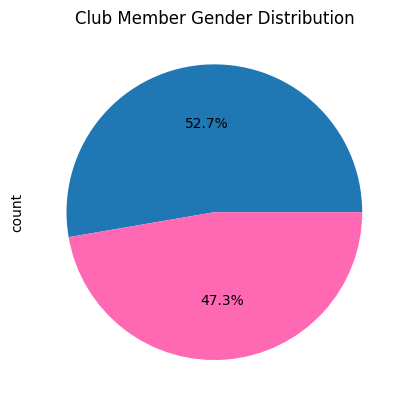

In [3]:
# Assign colors to genders
colors = {'M': config.GENDER_BLUE, 'F': config.GENDER_PINK}

# Count the number of members per gender
gender_distribution = active_members_extra_gender_df['gender'].value_counts()

# Plot the distribution of members
gender_distribution.plot(kind='pie', 
                         labels=['']*len(gender_distribution),  
                         colors=[colors[key] for key in gender_distribution.index], 
                         autopct='%1.1f%%')

# Add a title
plt.title('Club Member Gender Distribution', pad=0)

# Save and show the plot
plt.savefig(config.CLUB_MEMBER_GENDER_DISTRIBUTION)
plt.show()

# Club Member Demographics

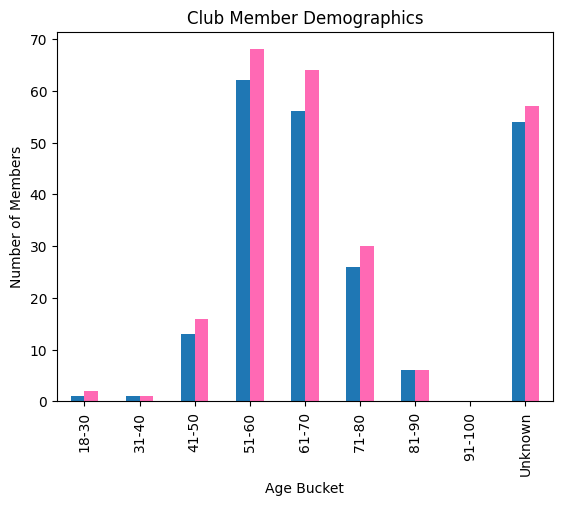

In [4]:
# Convert date_of_birth to datetime
active_members_extra_gender_df['date_of_birth'] = pd.to_datetime(active_members_extra_gender_df['date_of_birth'], errors='coerce')

# Calculate age
active_members_extra_gender_df['age'] = pd.Timestamp('now').year - active_members_extra_gender_df['date_of_birth'].dt.year

# Define age buckets
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
active_members_extra_gender_df['age_bucket'] = pd.cut(active_members_extra_gender_df['age'], bins=bins, labels=labels, right=False)

# Include 'Unknown' in age buckets
active_members_extra_gender_df['age_bucket'] = active_members_extra_gender_df['age_bucket'].cat.add_categories('Unknown').fillna('Unknown')

# Group by age bucket and gender
age_gender_distribution = active_members_extra_gender_df.groupby(['age_bucket', 'gender'], observed=False).size().unstack().fillna(0)

# Plot the age and gender distribution
age_gender_distribution.plot(kind='bar', color=[config.GENDER_BLUE, config.GENDER_PINK], legend=False)
plt.title('Club Member Demographics')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Members')

# Save and show the plot
plt.savefig(config.CLUB_MEMBER_AGE_GENDER_DISTRIBUTION)
plt.show()